In [2]:
import uproot
import awkward as ak #The events object is an awkward array
## Plotting.
import matplotlib.pyplot as plt

# Hists
import hist
from hist import Hist

# NanoEvents
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# Processors
#import coffea.processor as processor

#File to read
fname='WPLEPWMHADjj_4f_EWK_UL2018-NANOAODSIMv9.root'

#Define the events
events = NanoEventsFactory.from_root(
    fname,
    schemaclass=NanoAODSchema,
).events()

#List the branches of the root file 
ak.fields(events)

['GenVisTau',
 'L1Reco',
 'LHEPart',
 'SoftActivityJetHT10',
 'Muon',
 'LowPtElectron',
 'HLT',
 'fixedGridRhoFastjetCentralChargedPileUp',
 'DeepMETResolutionTune',
 'event',
 'RawPuppiMET',
 'ChsMET',
 'GenJet',
 'SoftActivityJetNjets2',
 'HLTriggerFirstPath',
 'L1',
 'HLTriggerFinalPath',
 'Generator',
 'SoftActivityJet',
 'Pileup',
 'GenMET',
 'TrigObj',
 'SV',
 'Photon',
 'boostedTau',
 'GenVtx',
 'L1simulation',
 'fixedGridRhoFastjetCentral',
 'genWeight',
 'fixedGridRhoFastjetAll',
 'PuppiMET',
 'luminosityBlock',
 'MET',
 'FatJet',
 'genTtbarId',
 'IsoTrack',
 'LHE',
 'TkMET',
 'SoftActivityJetHT5',
 'LHEWeight',
 'GenJetAK8',
 'Electron',
 'HTXS',
 'fixedGridRhoFastjetCentralCalo',
 'CorrT1METJet',
 'LHEReweightingWeight',
 'OtherPV',
 'GenDressedLepton',
 'L1PreFiringWeight',
 'Flag',
 'Tau',
 'SubGenJetAK8',
 'DeepMETResponseTune',
 'SoftActivityJetHT',
 'FsrPhoton',
 'SoftActivityJetHT2',
 'PV',
 'GenPart',
 'CaloMET',
 'LHEPdfWeight',
 'GenIsolatedPhoton',
 'Jet',
 'RawMET

Text(0.5, 1.0, 'MET distribution')

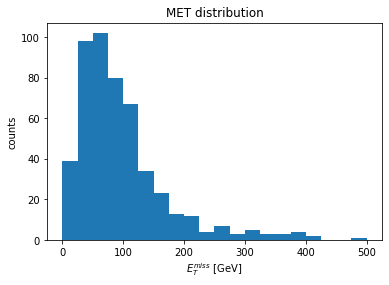

In [94]:
#Take the MET and plot its histogram
MET = events.MET.pt
MET_hist = plt.hist(MET, bins=20, range=[0,500], label="$E_{T}^{miss}$ [GeV]")
plt.xlabel("$E_{T}^{miss}$ [GeV]")
plt.ylabel("counts")
plt.title("MET distribution")
#plt.legend()

#Make histogram
#MET_hist=hist.Hist.new.Reg(20, 0, 500, name="MET", label="$E_{T}^{miss}$ [GeV]")
#Fill and plot histogram
#MET_hist.Double().fill(MET).plot1d()

Text(0.5, 1.0, 'muon $p_{T}$ distribution')

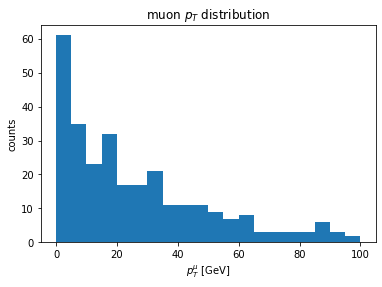

In [3]:
#Take the muon pt and plot its histogram
muonpt = events.Muon.pt
muon_hist = plt.hist(ak.flatten(muonpt), bins=20, range=[0,100], label="$p_{T}^{\mu}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays 
plt.xlabel("$p_{T}^{\mu}$ [GeV]")
plt.ylabel("counts")
plt.title("muon $p_{T}$ distribution")
#plt.legend()


Text(0.5, 1.0, 'electron $p_{T}$ distribution')

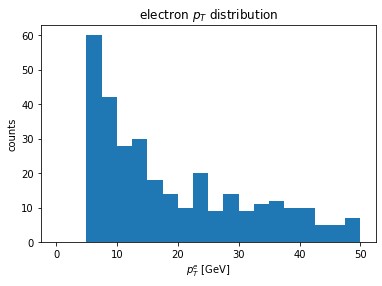

In [121]:
#Take the electron pt and plot its histogram
ept = events.Electron.pt
e_hist = plt.hist(ak.flatten(ept), bins=20, range=[0,50], label="$p_{T}^{e}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$p_{T}^{e}$ [GeV]")
plt.ylabel("counts")
plt.title("electron $p_{T}$ distribution")
#plt.legend()

Text(0.5, 1.0, 'jet $p_{T}$ distribution')

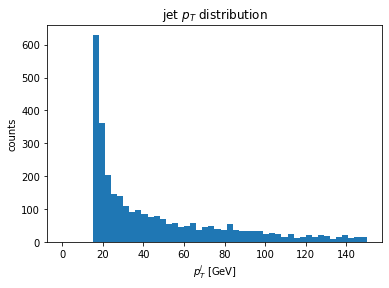

In [9]:
#Take the jet pt and plot its histogram
jpt = events.Jet.pt
jpt_hist = plt.hist(ak.flatten(jpt), bins=50, range=[0,150], label="$p_{T}^{j}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$p_{T}^{j}$ [GeV]")
plt.ylabel("counts")
plt.title("jet $p_{T}$ distribution")
#plt.legend()

Text(0.5, 1.0, 'jet pseudorapidity distribution')

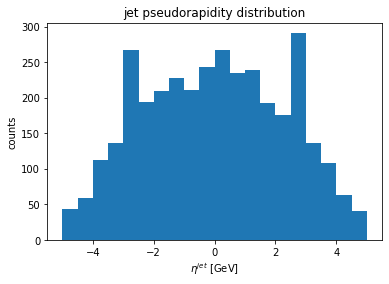

In [10]:
#Take the jet pseudorapidity and plot its histogram
jeta = events.Jet.eta
jeta_hist = plt.hist(ak.flatten(jeta), bins=20, range=[-5,5], label="$\eta^{j}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$\eta^{jet}$ [GeV]")
plt.ylabel("counts")
plt.title("jet pseudorapidity distribution")
#plt.legend()

Text(0.5, 1.0, 'jet mass distribution')

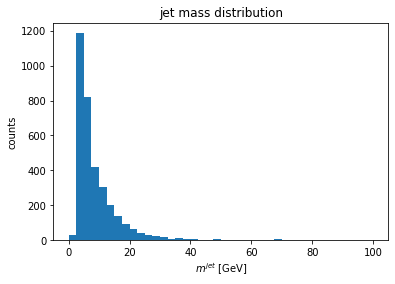

In [16]:
#Take the jet mass and plot its histogram
jm = events.Jet.mass
jm_hist = plt.hist(ak.flatten(jm), bins=40, range=[0,100], label="$m^{j}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$m^{jet}$ [GeV]")
plt.ylabel("counts")
plt.title("jet mass distribution")
#plt.legend()